In [ ]:
import numpy as np
import tensorflow as tf
import random
import os

SEED = 42

np.random.seed(SEED)
random.seed(SEED)
tf.random.set_seed(SEED)

os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [ ]:
import os

!apt-get install aria2 -y

actor_ids = [f"{i:02d}" for i in range(1, 25)]

base_url = "https://zenodo.org/records/1188976/files/Video_Speech_Actor_"

save_dir = "ravdess_video_speech"

os.makedirs(save_dir, exist_ok=True)

for actor_id in actor_ids:
    file_url = f"{base_url}{actor_id}.zip?download=1"
    zip_path = f"{save_dir}/Video_Speech_Actor_{actor_id}.zip"

    print(f"Downloading: {file_url}")
    os.system(f"aria2c -x 16 -s 16 '{file_url}' -o {zip_path}")

    print(f"Extracting: Video_Speech_Actor_{actor_id}.zip")
    os.system(f"unzip -q {zip_path} -d {save_dir}")

print("All video speech files downloaded and extracted successfully!")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libaria2-0 libc-ares2
The following NEW packages will be installed:
  aria2 libaria2-0 libc-ares2
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 1,513 kB of archives.
After this operation, 5,441 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-ares2 amd64 1.18.1-1ubuntu0.22.04.3 [45.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libaria2-0 amd64 1.36.0-1 [1,086 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 aria2 amd64 1.36.0-1 [381 kB]
Fetched 1,513 kB in 0s (8,892 kB/s)
Selecting previously unselected package libc-ares2:amd64.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../libc-ares2_1.18.1-1ubuntu0.22.04.3_amd64.deb ...
Unpacking libc-ares2:amd64 (1.18.1-1ubun

In [ ]:
import os
import shutil
import concurrent.futures

video_root_folder = "ravdess_video_speech"
audio_output_folder = "audio_files"

if os.path.exists(audio_output_folder):
    shutil.rmtree(audio_output_folder)
os.makedirs(audio_output_folder, exist_ok=True)

print("Cleared audio output directory before extraction.")

def extract_audio(video_path):
    video_file = os.path.basename(video_path)
    audio_output_path = os.path.join(audio_output_folder, video_file.replace(".mp4", ".wav"))
    os.system(f"ffmpeg -i '{video_path}' -ac 1 -ar 48000 '{audio_output_path}' -hide_banner -loglevel error")
    print(f"🎵 Extracted audio from {video_file}")

video_files = []
for actor in range(1, 25):
    actor_folder = os.path.join(video_root_folder, f"Actor_{actor:02d}/")

    if os.path.exists(actor_folder):
        for video_file in os.listdir(actor_folder):
            if video_file.endswith(".mp4") and video_file.startswith("01"):
                video_files.append(os.path.join(actor_folder, video_file))

print(f"Extracting audio from {len(video_files)} AV videos in parallel...")

with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.map(extract_audio, video_files)

print("🎉 Multi-threaded audio extraction completed using FFmpeg!")


Cleared audio output directory before extraction.
Extracting audio from 1440 AV videos in parallel...
🎵 Extracted audio from 01-01-03-01-02-02-01.mp4
🎵 Extracted audio from 01-01-08-01-01-02-01.mp4
🎵 Extracted audio from 01-01-02-01-02-02-01.mp4
🎵 Extracted audio from 01-01-06-02-01-02-01.mp4
🎵 Extracted audio from 01-01-04-01-01-01-01.mp4
🎵 Extracted audio from 01-01-08-02-01-02-01.mp4
🎵 Extracted audio from 01-01-03-02-01-01-01.mp4
🎵 Extracted audio from 01-01-07-01-01-02-01.mp4
🎵 Extracted audio from 01-01-05-01-02-02-01.mp4
🎵 Extracted audio from 01-01-02-01-01-02-01.mp4
🎵 Extracted audio from 01-01-07-02-02-02-01.mp4
🎵 Extracted audio from 01-01-08-02-02-02-01.mp4
🎵 Extracted audio from 01-01-01-01-02-01-01.mp4
🎵 Extracted audio from 01-01-02-02-01-02-01.mp4
🎵 Extracted audio from 01-01-04-02-01-02-01.mp4
🎵 Extracted audio from 01-01-04-02-02-01-01.mp4
🎵 Extracted audio from 01-01-01-01-02-02-01.mp4
🎵 Extracted audio from 01-01-06-01-02-02-01.mp4
🎵 Extracted audio from 01-01-01-01

In [ ]:
import os
import shutil

base_dir = "audio_files"
organized_dir = "organized_audio_files"

emotion_map = {
    "01": "Neutral",
    "02": "Calm",
    "03": "Happy",
    "04": "Sad",
    "05": "Angry",
    "06": "Fearful",
    "07": "Disgusted",
    "08": "Surprised"
}

os.makedirs(organized_dir, exist_ok=True)

for filename in os.listdir(base_dir):
    if filename.endswith(".wav"):
        parts = filename.split("-")
        emotion_code = parts[2]
        actor_id = f"Actor_{parts[-1].split('.')[0]}"
        emotion_name = emotion_map.get(emotion_code, "Unknown")
        actor_path = os.path.join(organized_dir, actor_id)
        emotion_path = os.path.join(actor_path, emotion_name)
        os.makedirs(emotion_path, exist_ok=True)
        source_path = os.path.join(base_dir, filename)
        destination_path = os.path.join(emotion_path, filename)
        shutil.move(source_path, destination_path)

print("Audio files have been organized successfully!")


Audio files have been organized successfully!


In [ ]:
import librosa
import librosa.display
import numpy as np
import os
import random
import shutil

audio_dir = "organized_audio_files"
mfcc_save_dir = "augmented_mfcc_features"

if os.path.exists(mfcc_save_dir):
    shutil.rmtree(mfcc_save_dir)
os.makedirs(mfcc_save_dir, exist_ok=True)

def augment_audio(y, sr):

    y_pitch_up = librosa.effects.pitch_shift(y, sr=sr, n_steps=2)
    y_pitch_down = librosa.effects.pitch_shift(y, sr=sr, n_steps=-2)

    y_speed_up = librosa.effects.time_stretch(y, rate=1.2)
    y_slow_down = librosa.effects.time_stretch(y, rate=0.9)

    y_noise = y + 0.005 * np.random.randn(len(y))

    shift = int(0.01 * sr)
    y_shifted = np.roll(y, shift)

    return [y, y_pitch_up, y_pitch_down, y_speed_up, y_slow_down, y_noise, y_shifted]

def extract_features(y, sr):
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    spec_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
    features = np.concatenate([mfcc, chroma, spec_contrast], axis=0)
    return features

for actor in os.listdir(audio_dir):
    actor_path = os.path.join(audio_dir, actor)
    if os.path.isdir(actor_path):
        for emotion in os.listdir(actor_path):
            emotion_path = os.path.join(actor_path, emotion)
            if os.path.isdir(emotion_path):
                save_emotion_path = os.path.join(mfcc_save_dir, actor, emotion)
                os.makedirs(save_emotion_path, exist_ok=True)
                for file in os.listdir(emotion_path):
                    if file.endswith(".wav"):
                        audio_path = os.path.join(emotion_path, file)
                        y, sr = librosa.load(audio_path, sr=22050)
                        augmented_audios = augment_audio(y, sr)
                        for i, aug_audio in enumerate(augmented_audios):
                            features = extract_features(aug_audio, sr)
                            file_name = f"{file.replace('.wav', '')}_aug_{i}.npy"
                            np.save(os.path.join(save_emotion_path, file_name), features)
                            if random.random() < 0.5:
                                duplicated_features = features + (np.random.randn(*features.shape) * 0.01)
                                duplicate_name = f"{file.replace('.wav', '')}_aug_{i}_dup.npy"
                                np.save(os.path.join(save_emotion_path, duplicate_name), duplicated_features)

print("✅ Data Augmentation & Feature Duplication Completed!")


✅ Data Augmentation & Feature Duplication Completed!


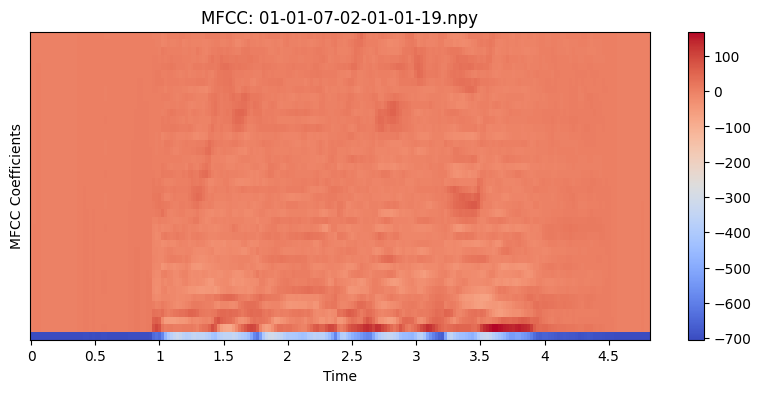

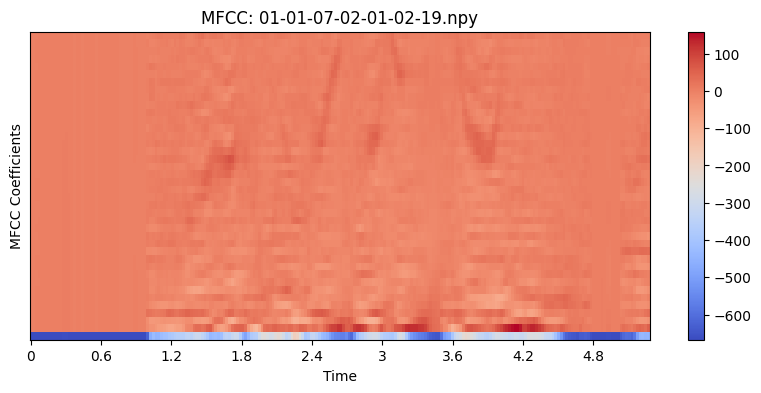

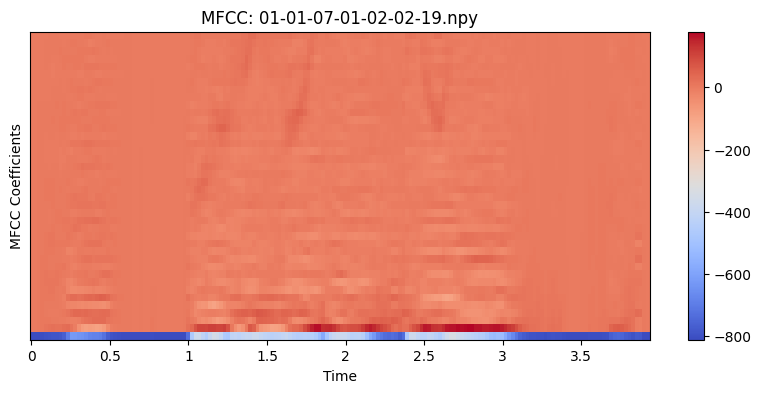

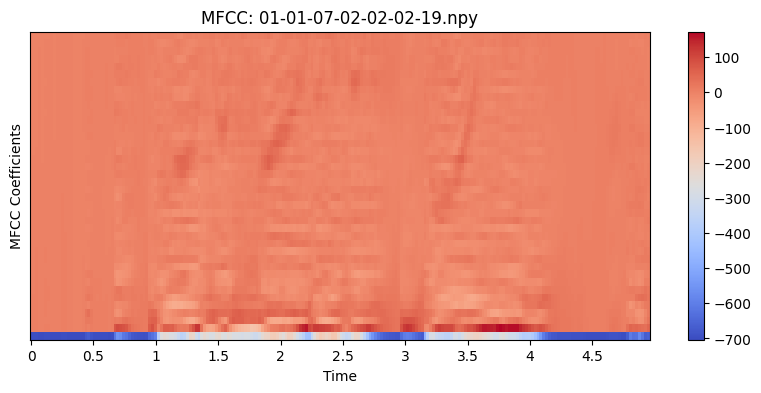

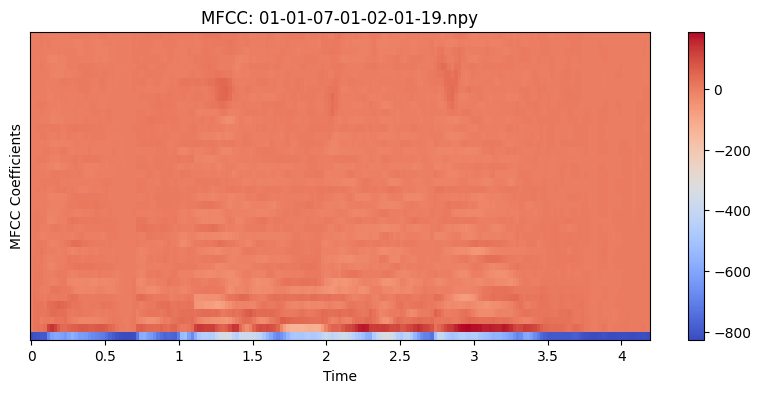

In [ ]:
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import os

mfcc_save_dir = "augmented_mfcc_features"

def visualize_mfcc(mfcc_path):
    mfcc = np.load(mfcc_path)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time')
    plt.colorbar()
    plt.title(f"MFCC: {os.path.basename(mfcc_path)}")
    plt.xlabel("Time")
    plt.ylabel("MFCC Coefficients")
    plt.show()

mfcc_files = []
for actor in os.listdir(mfcc_save_dir):
    actor_path = os.path.join(mfcc_save_dir, actor)
    if os.path.isdir(actor_path):
        for emotion in os.listdir(actor_path):
            emotion_path = os.path.join(actor_path, emotion)
            if os.path.isdir(emotion_path):
                for file in os.listdir(emotion_path):
                    if file.endswith(".npy"):
                        mfcc_files.append(os.path.join(emotion_path, file))

for mfcc_file in mfcc_files[:5]:
    visualize_mfcc(mfcc_file)


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

mfcc_dir = "augmented_mfcc_features"

X = []
y = []

for actor in os.listdir(mfcc_dir):
    actor_path = os.path.join(mfcc_dir, actor)
    if os.path.isdir(actor_path):
        for emotion in os.listdir(actor_path):
            emotion_path = os.path.join(actor_path, emotion)
            if os.path.isdir(emotion_path):
                for file in os.listdir(emotion_path):
                    if file.endswith(".npy"):
                        mfcc_path = os.path.join(emotion_path, file)
                        mfcc = np.load(mfcc_path)
                        mfcc = np.expand_dims(np.transpose(mfcc), axis=-1)

                        X.append(mfcc)
                        y.append(emotion)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

max_length = max([mfcc.shape[0] for mfcc in X])
print(max_length)
X_padded = np.array([np.pad(mfcc, ((0, max_length - mfcc.shape[0]), (0, 0), (0, 0)), mode='constant') for mfcc in X])

X_padded = np.array(X_padded)
y_categorical = np.array(y_categorical)

X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.15, random_state=42)

print("✅ Data Preprocessing Complete!")
print(f"Training Samples: {X_train.shape}, Test Samples: {X_test.shape}")


254
✅ Data Preprocessing Complete!
Training Samples: (12840, 254, 59, 1), Test Samples: (2267, 254, 59, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, Flatten, Dense, Dropout, BatchNormalization, TimeDistributed, Reshape

model = Sequential([
    Reshape((X_train.shape[1], X_train.shape[2], 1), input_shape=(X_train.shape[1], X_train.shape[2], X_train.shape[3])),

    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,1)),

    Dropout(0.3),

    Conv2D(256, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,1)),
    Dropout(0.3),

    TimeDistributed(Flatten()),

    LSTM(256, return_sequences=True),
    LSTM(128, return_sequences=True),
    LSTM(64, return_sequences=False),
    Dropout(0.3),

    Dense(64, activation='relu'),
    Dropout(0.3),

    Dense(y_train.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 254, 59, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 254, 59, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 59, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 254, 59, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 254, 59, 128)   │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 59, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 127, 59, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 127, 59, 256)   │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 127, 59, 256)   │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 59, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 63, 59, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 63, 15104)      │             0 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 63, 256)        │    15,729,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 63, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,352,328 (62.38 MB)

 Trainable params: 16,351,432 (62.38 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[lr_schedule])


Epoch 1/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 193s 454ms/step - accuracy: 0.1805 - loss: 2.0293 - val_accuracy: 0.2629 - val_loss: 1.8519 - learning_rate: 0.0010
Epoch 2/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 185s 460ms/step - accuracy: 0.2658 - loss: 1.8405 - val_accuracy: 0.3767 - val_loss: 1.6717 - learning_rate: 0.0010
Epoch 3/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 186s 461ms/step - accuracy: 0.3729 - loss: 1.6507 - val_accuracy: 0.4243 - val_loss: 1.5458 - learning_rate: 0.0010
Epoch 4/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 185s 461ms/step - accuracy: 0.4253 - loss: 1.5087 - val_accuracy: 0.4896 - val_loss: 1.4139 - learning_rate: 0.0010
Epoch 5/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 207s 475ms/step - accuracy: 0.4872 - loss: 1.3763 - val_accuracy: 0.4711 - val_loss: 1.4530 - learning_rate: 0.0010
Epoch 6/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 190s 474ms/step - accuracy: 0.5225 - loss: 1.2670 - val_accuracy: 0.5121 - val_loss: 1.3293 - learning_rate: 0.0010
Epoch 7/50
402/402 ━━━━━━━━━━━━━━━━━━━━ 185s 461ms/step - accura

In [ ]:
from sklearn.metrics import classification_report

y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

y_true = np.argmax(y_test, axis=1)

emotions = ["angry", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"]

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=emotions))


71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step
Classification Report:
              precision    recall  f1-score   support

       angry       0.98      0.97      0.98       334
        calm       0.94      0.99      0.97       306
     disgust       0.99      0.98      0.99       282
     fearful       0.98      0.95      0.97       292
       happy       0.95      0.97      0.96       303
     neutral       0.98      0.88      0.93       156
         sad       0.96      0.98      0.97       311
   surprised       0.97      0.98      0.97       283

    accuracy                           0.97      2267
   macro avg       0.97      0.96      0.97      2267
weighted avg       0.97      0.97      0.97      2267



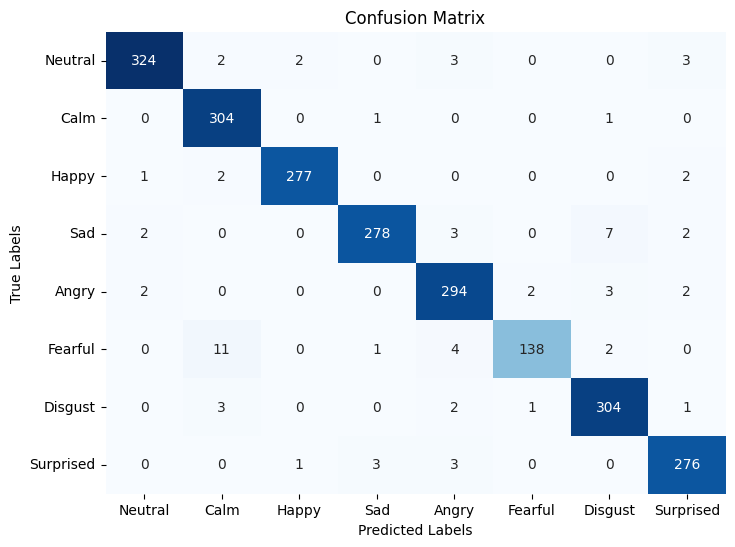

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Neutral", "Calm", "Happy", "Sad", "Angry", "Fearful", "Disgust", "Surprised"],
            yticklabels=["Neutral", "Calm", "Happy", "Sad", "Angry", "Fearful", "Disgust", "Surprised"], cbar=False)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


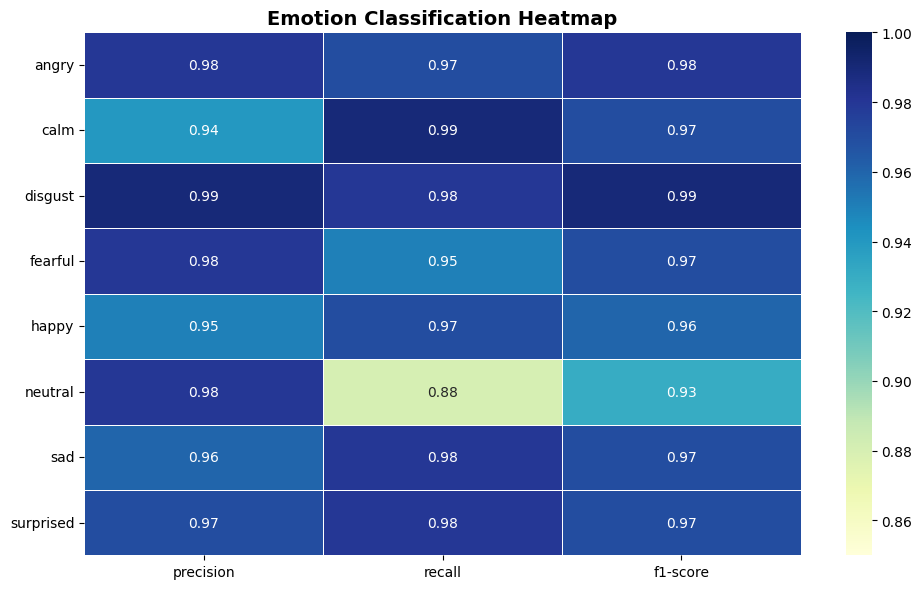

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({
    "precision": [0.98, 0.94, 0.99, 0.98, 0.95, 0.98, 0.96, 0.97],
    "recall":    [0.97, 0.99, 0.98, 0.95, 0.97, 0.88, 0.98, 0.98],
    "f1-score":  [0.98, 0.97, 0.99, 0.97, 0.96, 0.93, 0.97, 0.97]
}, index=["angry", "calm", "disgust", "fearful", "happy", "neutral", "sad", "surprised"])

plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap="YlGnBu", vmin=0.85, vmax=1.0, linewidths=0.5, fmt=".2f")

plt.title("Emotion Classification Heatmap", fontsize=14, weight='bold')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

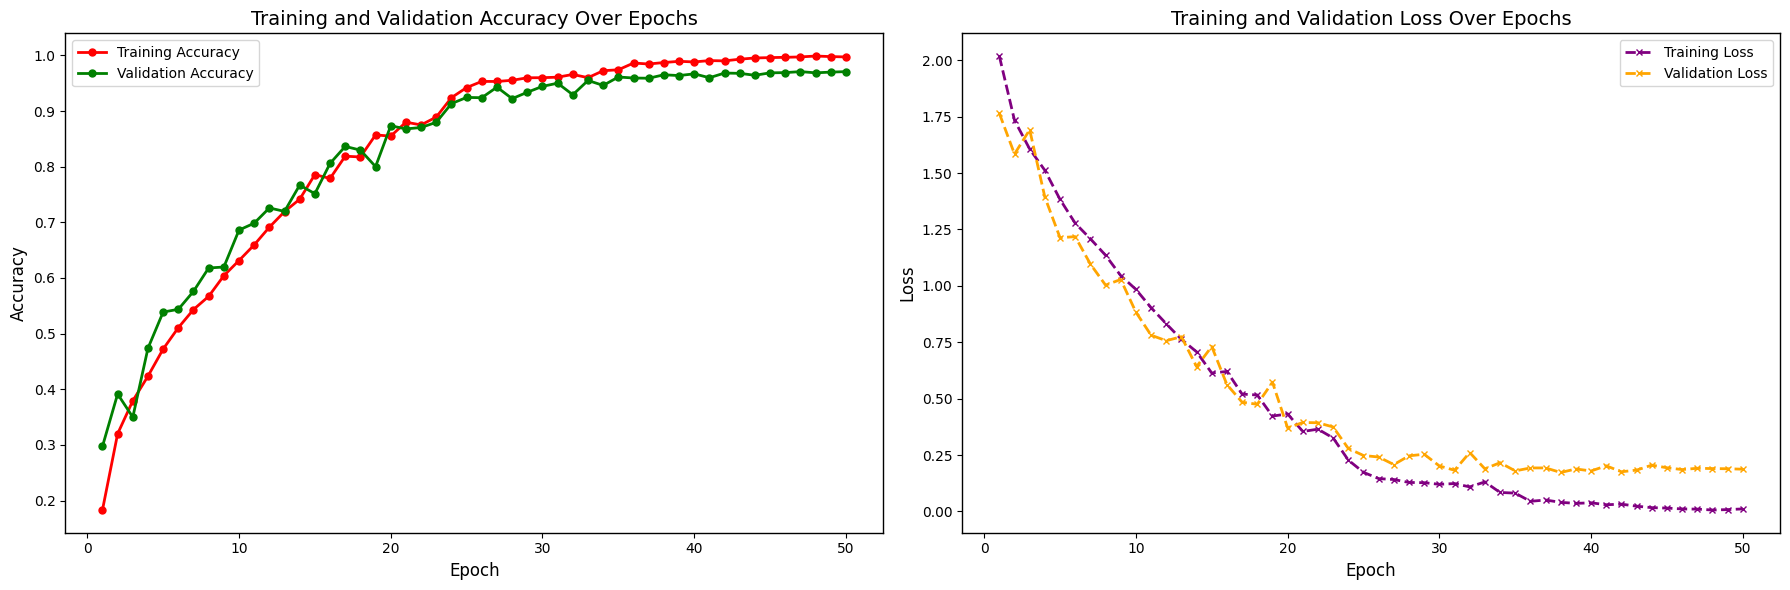

In [3]:
import matplotlib.pyplot as plt

epochs = list(range(1, 51))
train_acc = [0.1829, 0.3199, 0.3792, 0.4235, 0.4722, 0.5106, 0.5432, 0.5669, 0.6040, 0.6313, 0.6594, 0.6912, 0.7192, 0.7415, 0.7857, 0.7788, 0.8188, 0.8174, 0.8570, 0.8549, 0.8799, 0.8750, 0.8891, 0.9240, 0.9421, 0.9532, 0.9531, 0.9552, 0.9597, 0.9599, 0.9608, 0.9657, 0.9599, 0.9724, 0.9741, 0.9862, 0.9845, 0.9871, 0.9893, 0.9882, 0.9906, 0.9901, 0.9931, 0.9953, 0.9960, 0.9965, 0.9972, 0.9988, 0.9978, 0.9972]
val_acc = [0.2972, 0.3914, 0.3498, 0.4737, 0.5387, 0.5436, 0.5759, 0.6179, 0.6196, 0.6860, 0.6984, 0.7258, 0.7196, 0.7669, 0.7514, 0.8058, 0.8364, 0.8297, 0.8001, 0.8735, 0.8678, 0.8704, 0.8797, 0.9133, 0.9244, 0.9239, 0.9429, 0.9222, 0.9337, 0.9443, 0.9500, 0.9292, 0.9549, 0.9460, 0.9611, 0.9593, 0.9589, 0.9651, 0.9637, 0.9668, 0.9598, 0.9682, 0.9677, 0.9642, 0.9686, 0.9690, 0.9708, 0.9686, 0.9699, 0.9708]

train_loss = [2.0191, 1.7341, 1.6068, 1.5123, 1.3834, 1.2778, 1.2089, 1.1358, 1.0455, 0.9844, 0.9034, 0.8320, 0.7626, 0.7076, 0.6135, 0.6205, 0.5201, 0.5161, 0.4226, 0.4322, 0.3544, 0.3646, 0.3256, 0.2274, 0.1733, 0.1454, 0.1413, 0.1284, 0.1272, 0.1202, 0.1234, 0.1086, 0.1308, 0.0840, 0.0810, 0.0447, 0.0505, 0.0401, 0.0356, 0.0381, 0.0295, 0.0321, 0.0232, 0.0166, 0.0147, 0.0109, 0.0101, 0.0061, 0.0080, 0.0110]
val_loss = [1.7649, 1.5846, 1.6921, 1.3937, 1.2137, 1.2182, 1.0969, 1.0034, 1.0282, 0.8836, 0.7813, 0.7569, 0.7746, 0.6420, 0.7310, 0.5621, 0.4843, 0.4750, 0.5728, 0.3702, 0.3942, 0.3930, 0.3743, 0.2790, 0.2478, 0.2411, 0.2076, 0.2464, 0.2534, 0.2016, 0.1824, 0.2609, 0.1888, 0.2160, 0.1796, 0.1927, 0.1928, 0.1726, 0.1882, 0.1793, 0.2021, 0.1757, 0.1831, 0.2051, 0.1934, 0.1855, 0.1912, 0.1899, 0.1891, 0.1871]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

ax1.plot(epochs, train_acc, label='Training Accuracy', color='red', linewidth=2, marker='o', markersize=5)
ax1.plot(epochs, val_acc, label='Validation Accuracy', color='green', linewidth=2, marker='o', markersize=5)
ax1.set_title('Training and Validation Accuracy Over Epochs', fontsize=14)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.legend()
ax1.grid(False)
ax1.set_facecolor('white')
for spine in ax1.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

ax2.plot(epochs, train_loss, label='Training Loss', color='purple', linestyle='--', linewidth=2, marker='x', markersize=5)
ax2.plot(epochs, val_loss, label='Validation Loss', color='orange', linestyle='--', linewidth=2, marker='x', markersize=5)
ax2.set_title('Training and Validation Loss Over Epochs', fontsize=14)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.set_ylabel('Loss', fontsize=12)
ax2.legend()
ax2.grid(False)
ax2.set_facecolor('white')
for spine in ax2.spines.values():
    spine.set_visible(True)
    spine.set_color('black')
    spine.set_linewidth(1)

plt.tight_layout()
plt.show()